## Thanks to:
https://stackoverflow.com/questions/37003272/how-to-compute-jaccard-similarity-from-a-pandas-dataframe

In [209]:
import pandas as pd
from sklearn.metrics import jaccard_similarity_score, pairwise_distances
import os
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
dataframe = pd.read_csv('test_100.csv', sep='\t', header=0)

In [221]:
#6-25213 vs 6-85169

print(dataframe.columns.tolist())

['Position', 'N', 'Samples', 'P1152', 'AL39835', '6-25213', '6-85169', '6-49128', 'P1150', 'T18-055', '14N1', 'T18-043', '2B1', '14N13', '6-37190', '1B3', 'AL2985503', 'T18-054', '6-48233', '76-15094', '6-37453']


In [64]:
dataframe.head()

,Position,N,Samples,P1152,AL39835,6-25213,6-85169,6-49128,P1150,T18-055,...,T18-043,2B1,14N13,6-37190,1B3,AL2985503,T18-054,6-48233,76-15094,6-37453
0,1977.0,4.0,"14N1,2B1,14N13,1B3",0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2532.0,4.0,"14N1,2B1,14N13,1B3",0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,6438.0,1.0,6-37453,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7585.0,5.0,"14N1,2B1,14N13,1B3,AL2985503",0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,8040.0,2.0,"P1152,P1150",1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
var = "%s\t%s" % (dataframe.shape)
print(var)

390	21


In [192]:
def compare_jaccard_columns(sample1, sample2, df):
    jaccard_similarity = jaccard_similarity_score(df[sample1], df[sample2])
    return jaccard_similarity

def compare_snp_columns(sample1, sample2, df):
    jaccard_similarity = jaccard_similarity_score(df[sample1], df[sample2]) #similarities between colums
    hamming_similarity = 1 - jaccard_similarity #disagreements between colums
    snp_distance = int(hamming_similarity * (len(df.index)+1))
    return snp_distance

def snp_distance_pairwise(dataframe, output_file):
    if os.path.exists(output_file):
        os.remove(output_file)
    with open(output_file, "a") as f:
        for sample1 in dataframe.iloc[:,3:].columns: #remove first 3 colums
            for sample2 in dataframe.iloc[:,3:].columns:
                snp_distance = compare_snp_columns(sample1, sample2, dataframe)
                line_distance = "%s\t%s\t%s\n" % (sample1, sample2, snp_distance)
                f.write(line_distance) 
                #print(sample1, sample2, snp_distance)

In [193]:
snp_distance_pairwise(dataframe, 'test_data_pairwise.csv')

In [194]:
sample1='6-37190'
sample2='6-48233'
comparing2 = compare_jaccard_columns(sample1, sample2 , dataframe)
hamming2 = 1 - comparing2
print(comparing2)
print(hamming2)
print(int((hamming2 * (len(dataframe.index) +1))))
print(compare_snp_columns(sample1,sample2,dataframe))

0.9948717948717949
0.00512820512820511
2
2


In [58]:
#print("SNP distance between %s and %s are: %s" % (sample1, sample2, int((1 - comparing2) * len(dataframe.index + 1)
                                                                       
print("SNP distance between %s and %s are: %s" % (sample1, sample2, compare_snp_columns(sample1, sample2, dataframe)))

SNP distance between 6-25213 and 6-85169 are: 8


In [67]:
# Delete multiple columns from the dataframe
data_hamming = dataframe.drop(['Position','N','Samples'], axis=1)


In [218]:
data_hamming.head()

,P1152,AL39835,6-25213,6-85169,6-49128,P1150,T18-055,14N1,T18-043,2B1,14N13,6-37190,1B3,AL2985503,T18-054,6-48233,76-15094,6-37453
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
hamming_distance = pairwise_distances(data_hamming.T, metric = "hamming") #dataframe.T means transposed


In [133]:
hamming_distance_df = pd.DataFrame(jaccard_distance, index=data_hamming.columns, columns=data_hamming.columns) #Add index


snp_distance_df = pd.DataFrame(hamming_distance * len(data_hamming.index), index=data_hamming.columns, columns=data_hamming.columns) #Add index
snp_distance_df = snp_distance.astype(int)
#jac_sim = pd.DataFrame(jac_sim, index=df.columns, columns=df.columns)
# jac_sim = np.triu(jac_sim) to set the lower diagonal to zero
# jac_sim = np.tril(jac_sim) to set the upper diagonal to zero

In [135]:
snp_distance_df

,P1152,AL39835,6-25213,6-85169,6-49128,P1150,T18-055,14N1,T18-043,2B1,14N13,6-37190,1B3,AL2985503,T18-054,6-48233,76-15094,6-37453
P1152,0,99,105,105,108,0,142,94,128,94,94,108,94,94,103,110,104,99
AL39835,99,0,105,99,96,99,144,90,128,96,90,102,96,88,103,102,105,105
6-25213,105,105,0,8,13,105,144,99,128,102,99,4,102,104,103,6,22,8
6-85169,105,99,8,0,12,105,142,98,128,102,98,6,102,98,103,6,26,13
6-49128,108,96,13,12,0,108,142,102,128,104,102,13,104,102,103,13,30,20
P1150,0,99,105,105,108,0,142,94,128,94,94,108,94,94,103,110,104,99
T18-055,142,144,144,142,142,142,0,142,122,142,142,142,142,142,103,144,142,142
14N1,94,90,99,98,102,94,142,0,128,27,0,99,27,49,103,102,99,99
T18-043,128,128,128,128,128,128,122,128,0,128,128,128,128,128,30,128,128,128
2B1,94,96,102,102,104,94,142,27,128,0,27,104,0,58,103,105,99,99


In [136]:
hamming_distance_df

,P1152,AL39835,6-25213,6-85169,6-49128,P1150,T18-055,14N1,T18-043,2B1,14N13,6-37190,1B3,AL2985503,T18-054,6-48233,76-15094,6-37453
P1152,0.000000,0.256410,0.271795,0.271795,0.276923,0.000000,0.364103,0.241026,0.328205,0.241026,0.241026,0.276923,0.241026,0.241026,0.264103,0.282051,0.266667,0.256410
AL39835,0.256410,0.000000,0.271795,0.256410,0.246154,0.256410,0.369231,0.230769,0.328205,0.246154,0.230769,0.261538,0.246154,0.225641,0.264103,0.261538,0.271795,0.271795
6-25213,0.271795,0.271795,0.000000,0.020513,0.035897,0.271795,0.369231,0.256410,0.328205,0.261538,0.256410,0.010256,0.261538,0.266667,0.264103,0.015385,0.056410,0.020513
6-85169,0.271795,0.256410,0.020513,0.000000,0.030769,0.271795,0.364103,0.251282,0.328205,0.261538,0.251282,0.015385,0.261538,0.251282,0.264103,0.015385,0.066667,0.035897
6-49128,0.276923,0.246154,0.035897,0.030769,0.000000,0.276923,0.364103,0.261538,0.328205,0.266667,0.261538,0.035897,0.266667,0.261538,0.264103,0.035897,0.076923,0.051282
P1150,0.000000,0.256410,0.271795,0.271795,0.276923,0.000000,0.364103,0.241026,0.328205,0.241026,0.241026,0.276923,0.241026,0.241026,0.264103,0.282051,0.266667,0.256410
T18-055,0.364103,0.369231,0.369231,0.364103,0.364103,0.364103,0.000000,0.364103,0.312821,0.364103,0.364103,0.364103,0.364103,0.364103,0.264103,0.369231,0.364103,0.364103
14N1,0.241026,0.230769,0.256410,0.251282,0.261538,0.241026,0.364103,0.000000,0.328205,0.071795,0.000000,0.256410,0.071795,0.128205,0.264103,0.261538,0.256410,0.256410
T18-043,0.328205,0.328205,0.328205,0.328205,0.328205,0.328205,0.312821,0.328205,0.000000,0.328205,0.328205,0.328205,0.328205,0.328205,0.079487,0.328205,0.328205,0.328205
2B1,0.241026,0.246154,0.261538,0.261538,0.266667,0.241026,0.364103,0.071795,0.328205,0.000000,0.071795,0.266667,0.000000,0.148718,0.264103,0.271795,0.256410,0.256410


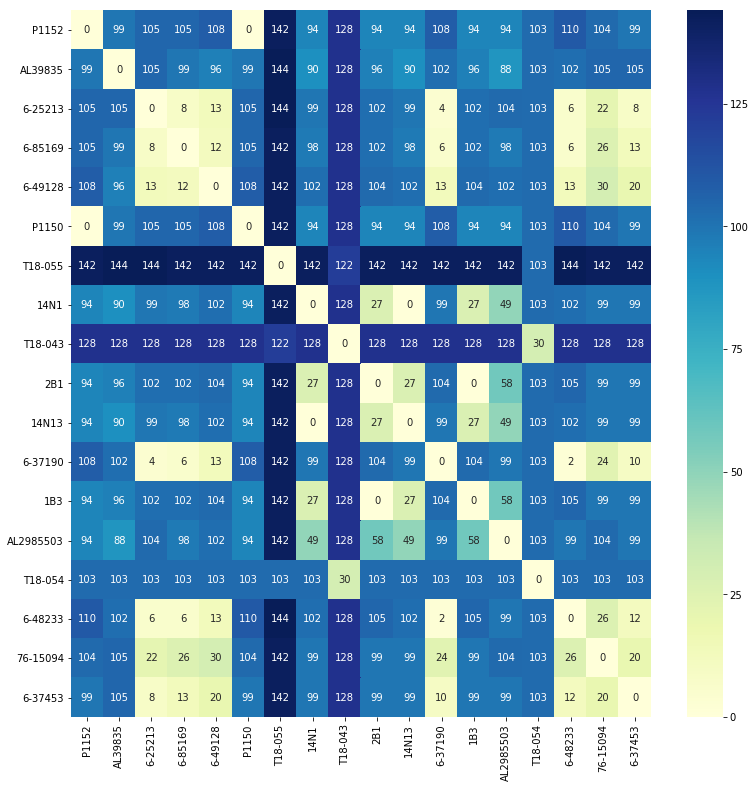

In [210]:
plt.figure(figsize=(13,13))
sns.heatmap(snp_distance_df, annot=True, fmt="d", cmap="YlGnBu") #linewidths=.5

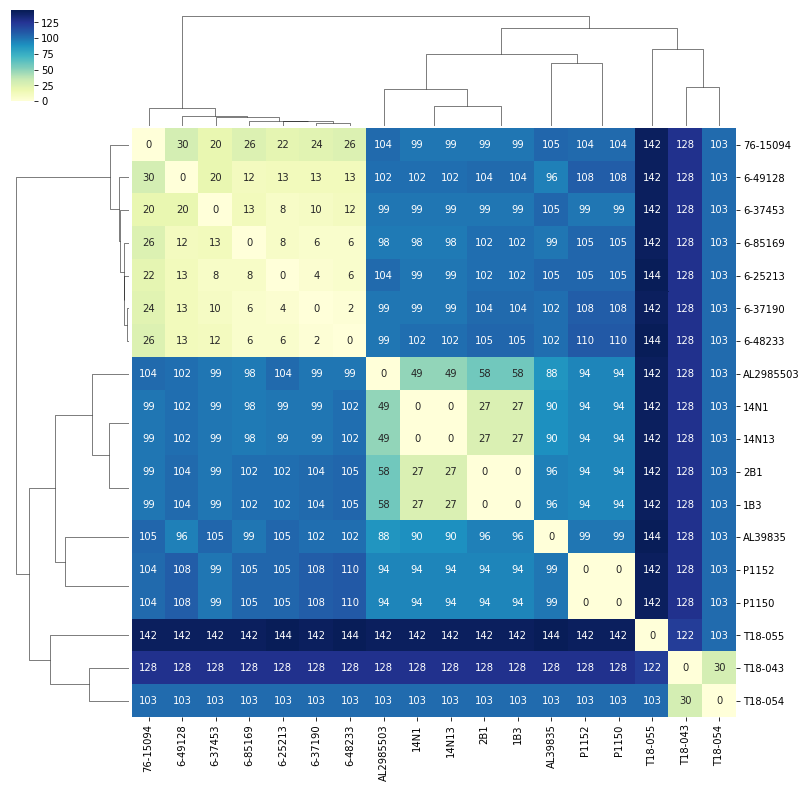

In [203]:
sns.clustermap(snp_distance_df, annot=True, fmt="d", cmap="YlGnBu", figsize=(13, 13)) #linewidths=.5

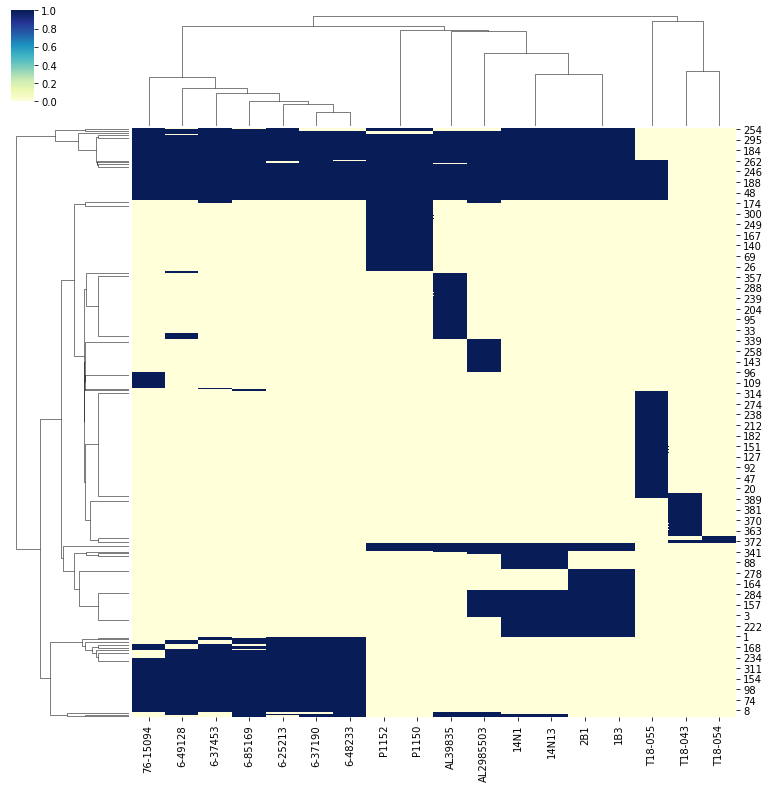

In [215]:
sns.clustermap(data_hamming, annot=False, cmap="YlGnBu", figsize=(13, 13)) #linewidths=.5, method="single"